In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

In [10]:
mtest=pd.read_csv("Mobile_price_test.csv")
mtrain=pd.read_csv("Mobile_price_train.csv")


In [11]:
mtest.head(n=11)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [12]:
mtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
mtrain["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [15]:
mtrain.shape,mtest.shape

((2000, 21), (1000, 21))

# EDA

In [ ]:
#CHECK missing value

In [16]:
mtrain.isnull().sum()/len(mtrain)*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [17]:
mtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Preprocessing

In [ ]:
# First combine the train and test data and then preprocess.
# Before modeling we will again split the dataset into train and test and will train the model on traininig data only

In [18]:
mtrain['Data_Type']='Train'
mtest['Data_Type']='Test'

In [23]:
mtest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Data_Type
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,Test
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,Test
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,Test
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,Test
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,Test


In [19]:
mtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Data_Type
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,Train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,Train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,Train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,Train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,Train


In [ ]:
#drop id colum from test data and add price_range depend variable in test data

In [28]:
mtest.drop(columns=["id"],inplace=True)

In [29]:
mtest['price_range']=np.nan

In [30]:
mtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Data_Type,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,Test,NaN
1,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,Test,NaN
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,Test,NaN
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,Test,NaN
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,Test,NaN


In [31]:
mtrain.shape,mtest.shape

((2000, 22), (1000, 22))

In [32]:
df=pd.concat((mtrain,mtest),ignore_index=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Data_Type
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,Train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,Train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,Train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,Train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,Train


In [33]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Data_Type
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,Test
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,Test
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,Test
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,Test
2999,1270,1,0.5,0,4,1,35,0.1,140,6,...,608,2828,9,2,3,1,0,1,NaN,Test


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


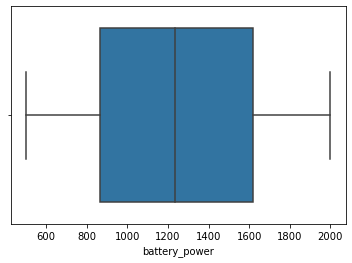

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


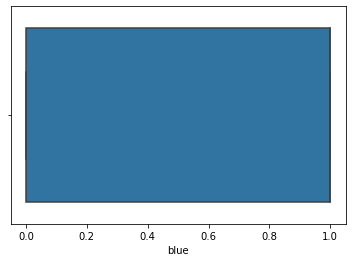

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


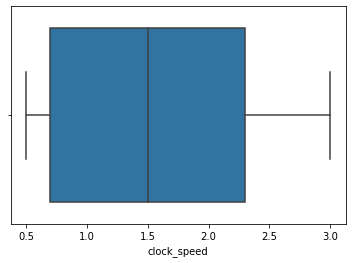

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


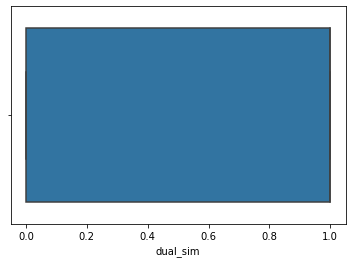

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


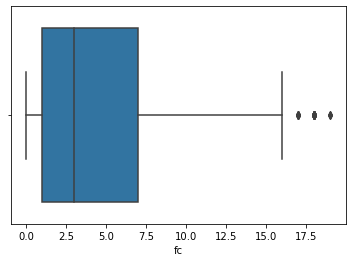

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


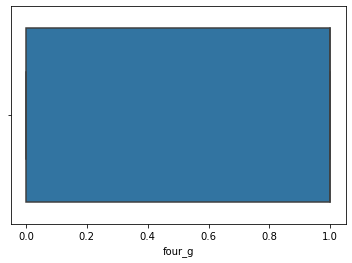

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


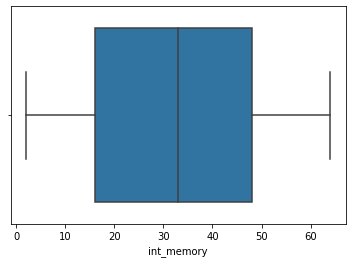

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


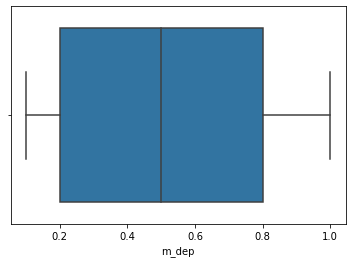

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


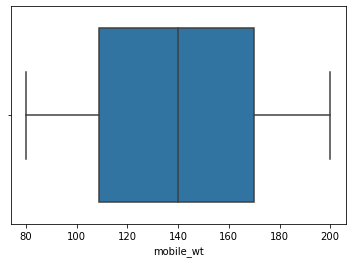

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


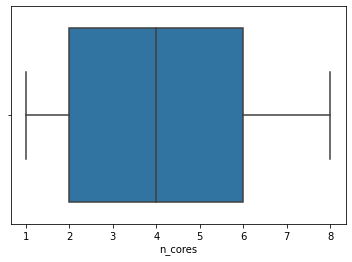

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


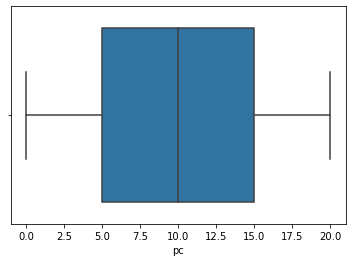

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


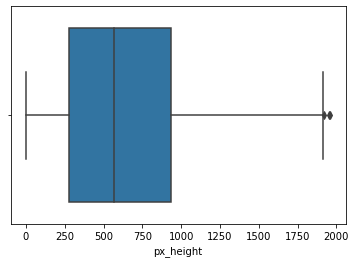

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


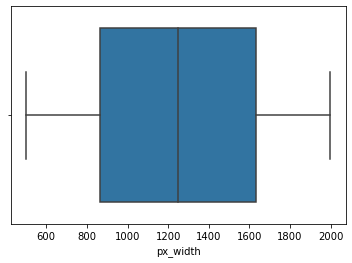

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


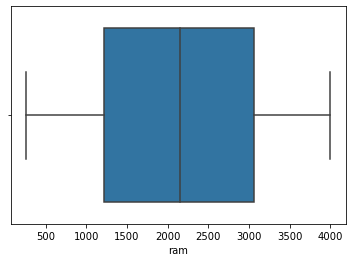

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


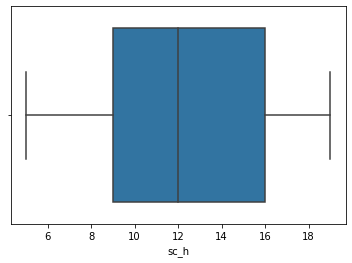

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


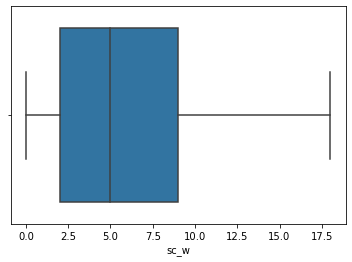

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


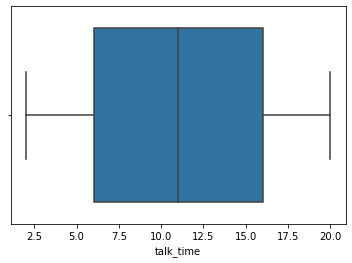

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


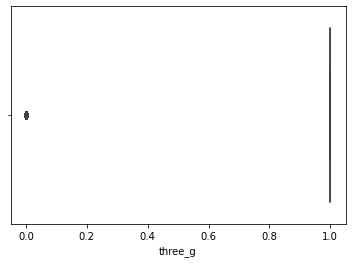

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


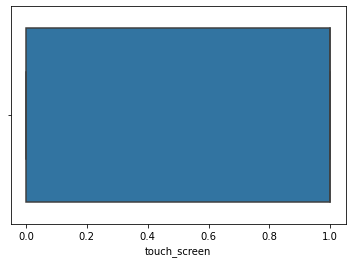

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


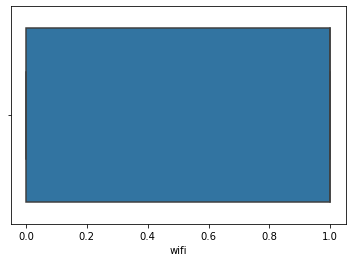

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


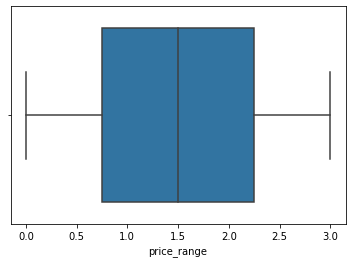

In [45]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list (df.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

In [46]:
#there is no outlier present in dataset
# Coorelation
df[df.Data_Type=='Train'].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

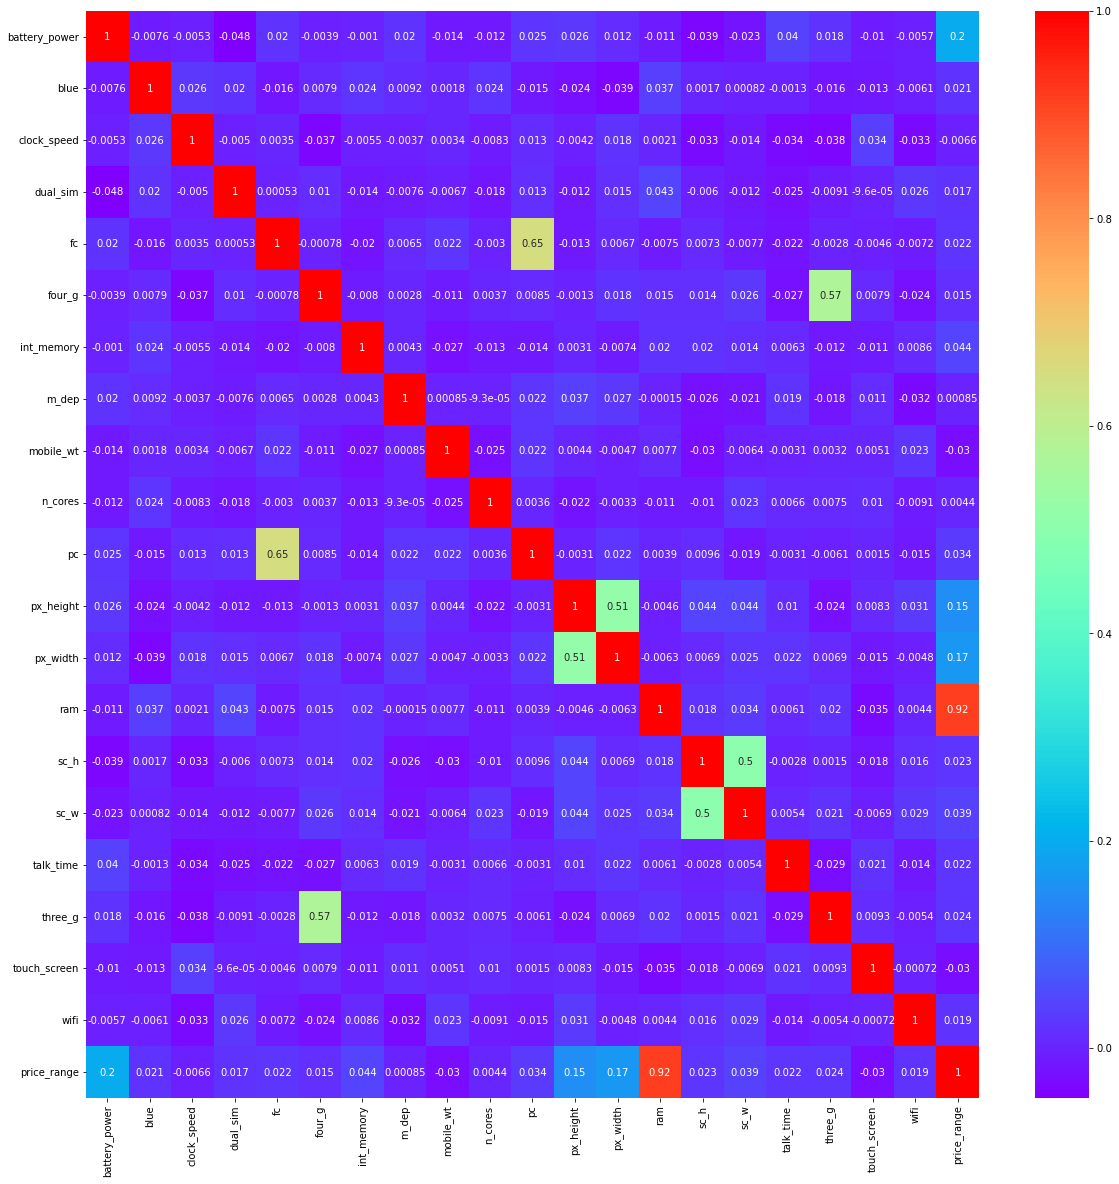

In [47]:

# Finding correlation
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

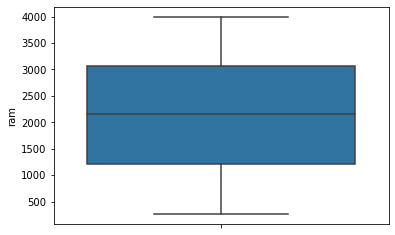

In [49]:
sns.boxplot(y="ram",data=df)
plt.show()

In [52]:
train_data=df[df.Data_Type=='Train']
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Data_Type
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,Train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,Train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,Train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,Train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,Train


In [53]:
train_data.shape

(2000, 22)

In [54]:
test_data=df[df.Data_Type=='Test']
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Data_Type
2000,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,NaN,Test
2001,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,NaN,Test
2002,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,NaN,Test
2003,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,NaN,Test
2004,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,NaN,Test


In [ ]:
train_data.drop('Data_Type',axis=1,inplace=True)
test_data.drop('Data_Type',axis=1,inplace=True)

In [57]:
train_data.shape,test_data.shape

((2000, 21), (1000, 21))

In [58]:
test_data.drop('price_range',axis=1,inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_11392\3007923716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('price_range',axis=1,inplace=True)


In [59]:
test_data.shape

(1000, 20)

In [ ]:
# The train_data again we have split into train and validation data (80-20 ratio) 

In [60]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split(train_data,train_size,random_state)

In [61]:
new_train_data,val_data=train_test_split(train_data,train_size=.80,random_state=120)

In [62]:
new_train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
240,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2.0
1960,1063,0,2.0,0,0,0,27,0.2,86,6,...,201,582,2668,12,5,19,0,0,0,2.0
1804,1702,1,2.3,1,12,1,47,0.6,107,2,...,1284,1643,595,10,0,19,1,0,1,1.0
1342,1974,0,0.5,1,9,0,10,0.8,145,6,...,530,1496,1433,6,1,17,0,0,0,1.0
1793,1299,1,2.8,1,0,0,64,0.5,83,6,...,46,908,1938,19,8,5,1,0,1,1.0


In [63]:
val_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1890,1991,0,2.8,0,3,1,15,0.1,181,1,...,298,1037,1861,8,5,17,1,1,1,1.0
1005,1270,1,2.3,0,0,0,58,0.5,104,5,...,1512,1716,3299,13,4,16,0,0,1,3.0
29,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0.0
695,560,1,2.0,1,6,1,57,0.3,81,3,...,80,1327,2167,11,10,7,1,0,1,1.0
1858,1615,1,2.8,0,3,0,9,0.9,117,1,...,542,678,2948,8,3,3,1,1,0,2.0


In [64]:
train_data.shape,new_train_data.shape,val_data.shape

((2000, 21), (1600, 21), (400, 21))

# Modeling

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm=LinearRegression()
train_features=new_train_data.drop('price_range',axis=1)
train_features.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
1960,1063,0,2.0,0,0,0,27,0.2,86,6,7,201,582,2668,12,5,19,0,0,0
1804,1702,1,2.3,1,12,1,47,0.6,107,2,19,1284,1643,595,10,0,19,1,0,1
1342,1974,0,0.5,1,9,0,10,0.8,145,6,12,530,1496,1433,6,1,17,0,0,0
1793,1299,1,2.8,1,0,0,64,0.5,83,6,6,46,908,1938,19,8,5,1,0,1


In [67]:
train_target=new_train_data['price_range']
train_target.head()

240     2.0
1960    2.0
1804    1.0
1342    1.0
1793    1.0
Name: price_range, dtype: float64

In [69]:
# Validation features

val_features=val_data.drop('price_range',axis=1)
val_features.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1890,1991,0,2.8,0,3,1,15,0.1,181,1,13,298,1037,1861,8,5,17,1,1,1
1005,1270,1,2.3,0,0,0,58,0.5,104,5,1,1512,1716,3299,13,4,16,0,0,1
29,851,0,0.5,0,3,0,21,0.4,200,5,7,1171,1263,478,12,7,10,1,0,1
695,560,1,2.0,1,6,1,57,0.3,81,3,12,80,1327,2167,11,10,7,1,0,1
1858,1615,1,2.8,0,3,0,9,0.9,117,1,13,542,678,2948,8,3,3,1,1,0


In [70]:
# Validation Target
val_target=val_data.price_range
val_target.head()

1890    1.0
1005    3.0
29      0.0
695     1.0
1858    2.0
Name: price_range, dtype: float64

In [71]:
lm.fit(train_features,train_target)

LinearRegression()

In [72]:
lm.coef_

array([ 0.0005253 , -0.00401961, -0.00898777, -0.01585685,  0.00281476,
        0.00924011,  0.00089068, -0.01838473, -0.00078327,  0.00044634,
       -0.0002814 ,  0.00027103,  0.00028431,  0.00094881, -0.00103667,
        0.00015076,  0.00084537,  0.02532727, -0.01523724, -0.01598876])

In [73]:
dict(zip(train_features.columns,lm.coef_))

{'battery_power': 0.0005253034745368898,
 'blue': -0.004019608794357666,
 'clock_speed': -0.008987765907440408,
 'dual_sim': -0.01585684753865449,
 'fc': 0.0028147572564223844,
 'four_g': 0.00924011005389988,
 'int_memory': 0.0008906847274786855,
 'm_dep': -0.018384727754572068,
 'mobile_wt': -0.0007832743989386715,
 'n_cores': 0.0004463412912947131,
 'pc': -0.0002813980885135188,
 'px_height': 0.00027102642330848565,
 'px_width': 0.00028431343077367147,
 'ram': 0.0009488091989812962,
 'sc_h': -0.0010366736877813621,
 'sc_w': 0.00015076368924152076,
 'talk_time': 0.0008453662148003079,
 'three_g': 0.0253272723649259,
 'touch_screen': -0.015237241927139105,
 'wifi': -0.01598875793721066}

In [74]:
lm.intercept_

-1.5981570803751823

# Prediction

In [75]:
train_predict=lm.predict(train_features)
train_predict

array([ 2.46040717,  1.65172855,  0.63564552, ..., -0.27271056,
        1.11115122,  0.00445718])

In [76]:
val_predict=lm.predict(val_features)
val_predict

array([ 1.44904382,  3.01970273, -0.15581787,  1.12445604,  2.2676173 ,
        0.63561247,  1.56943861,  2.30718837,  2.99414229,  0.84828703,
        0.17163027,  2.07155449,  3.20005908,  2.89099024,  1.29572686,
        3.24493708,  0.57071546,  1.15707926,  1.02734422,  3.59513381,
        0.30396365,  0.04860745,  1.02276923,  0.18204591,  1.32965452,
        3.25439484,  2.41591904,  2.67060971,  0.20798432,  1.09329378,
       -0.19118942,  0.56120337, -0.03524606, -0.04592085,  1.9479178 ,
        0.94226275,  0.24220805,  2.84057042, -0.02621325,  1.16867898,
        2.56137708,  0.23737723,  2.95961371,  1.9817995 ,  3.51751978,
        0.87798025,  0.23796441,  1.73001587,  2.64296336,  1.13910124,
        1.92657758,  3.29073563,  1.02038142,  2.7126432 ,  2.95971973,
        3.03533162,  1.61801392,  0.34134842,  1.9605693 ,  0.92546719,
        2.39867593,  2.41480247,  2.53717338,  0.65497536,  0.25933954,
        1.80904518,  0.18446773,  0.23367295, -0.1603962 ,  2.56

In [77]:
lm.score(train_features,train_target)

0.9171852466254222

In [78]:
lm.score(val_features,val_target)*100

92.30772931927218

# Get the predictions

In [79]:
train_predicted=lm.predict(train_features)
train_predicted

array([ 2.46040717,  1.65172855,  0.63564552, ..., -0.27271056,
        1.11115122,  0.00445718])

In [80]:
val_predicted=lm.predict(val_features)
val_predicted

array([ 1.44904382,  3.01970273, -0.15581787,  1.12445604,  2.2676173 ,
        0.63561247,  1.56943861,  2.30718837,  2.99414229,  0.84828703,
        0.17163027,  2.07155449,  3.20005908,  2.89099024,  1.29572686,
        3.24493708,  0.57071546,  1.15707926,  1.02734422,  3.59513381,
        0.30396365,  0.04860745,  1.02276923,  0.18204591,  1.32965452,
        3.25439484,  2.41591904,  2.67060971,  0.20798432,  1.09329378,
       -0.19118942,  0.56120337, -0.03524606, -0.04592085,  1.9479178 ,
        0.94226275,  0.24220805,  2.84057042, -0.02621325,  1.16867898,
        2.56137708,  0.23737723,  2.95961371,  1.9817995 ,  3.51751978,
        0.87798025,  0.23796441,  1.73001587,  2.64296336,  1.13910124,
        1.92657758,  3.29073563,  1.02038142,  2.7126432 ,  2.95971973,
        3.03533162,  1.61801392,  0.34134842,  1.9605693 ,  0.92546719,
        2.39867593,  2.41480247,  2.53717338,  0.65497536,  0.25933954,
        1.80904518,  0.18446773,  0.23367295, -0.1603962 ,  2.56